## import dependencies

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import tensorflow
from scipy.special import expit # normalization sigmoid function to get numbers from 0-1
import matplotlib.pyplot as plt


## import dataset 
using mnist dataset becasue its easy and well documented

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(train_set, train_label), (test_set, test_label) = mnist.load_data()

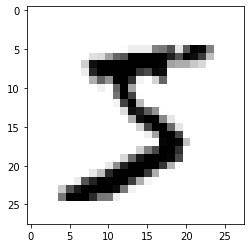

In [9]:
plt.imshow(train_set[0][:,:], cmap = plt.cm.binary)

In [10]:
train_set.shape

(60000, 28, 28)

In [11]:
train_set = train_set.reshape(60000,-1)/255
train_set.shape

(60000, 784)

In [12]:
def imshow(arr):
    plt.imshow( (arr.reshape(28,28) * 255)[:,:], cmap= plt.cm.binary)

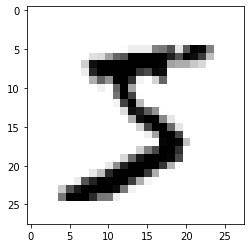

In [13]:
imshow(train_set[0])

In [14]:
train_label[0]

5

## Create the network

- We need a set of weight `W` matrices, that represent how much emphasis each previous layer has on the next layer
- We need a set of bias `b` vectors, that represent how "often" a node/neuron is active
- We need am error function to check how good/ bad our results are, this will be used to determine how we will back propagate

In [15]:
RAND_WEIGHT_INIT = 20

In [16]:
# calc outputs for one layer
# @param previousActivations is the input to the next layer, this can either be the actual input data, or it can be the activations of a previous layer (size n)
# @param weightMatrix is a matrix of the weights that determine the next node layer's activation, (size n by m)
# @param nodeBiases are the biases applied to the activation layer we are trying to determine, (size n)
# @return nodes are the activations of the next layer's nodes (size m)
def prop_forward(previousActivations, weightMatrix, nodeBiases):
    return expit( (previousActivations @ weightMatrix) + nodeBiases) 
    # each node is the sum of positive and negative weights times the respective input, 
    # expit is the sigmoid applied to the node activations so that they are values between 0-1

In [28]:
# take outputs, weights and activations, and return the weights and biases adjustments for the whole network
# @param currentActivations is all the neuron activations for each layer of the neural net
#        Note: this will include the input and output layers, not just the hidden ones
#        dims: L (layer amount) by N (Neuron amount at that layer)
# @param currentWeights is all the weights at each layer of the neural net
#        dims: L (layer amount) by N (neuron amount at that layer) by M (neuron amount at the next layer)
# @param desiredOutputs are the correct outputs 
#        dims: N (amount of final neuron activations)
# @return dW how much to change the most recent weights
#        dims: L (layer amount) by N (neuron amount at that layer) by M (neuron amount at the next layer)
# @return db how much to change the most recent biases
#        Note: deltas are the change in biases for each node
#        dims: L (layer amount) by N (neuron amount at that layer)
def prop_backward(currentActivations, currentWeights, desiredOutputs):
    layerAmt = len(currentActivations) # note that this includes the inputs and the outputs
    # print(layerAmt)
    dW = []
    db = [] # db is both change in biases and delta
    # base case, calc first delta
    db.append( 2 * (desiredOutputs - currentActivations[-1])*sigmoid_derivative(currentActivations[-1]))

    # print( currentActivations[-2].reshape(-1,1).shape )
    # print( db[-1].reshape(-1,1).T.shape )
    # then calc first change
    dW.append( currentActivations[-2].reshape(-1,1) @ db[-1].reshape(-1,1).T )

    # for each subsequent layer, calc delta and then change
    for i in reversed(range(layerAmt-1)):                    
    # subtract 2 becuase we did the initial output layer, and we will not calculate weights that 
    # go into the input layer\
        # i = i+1
        print("reverse iteration: "+ str(i))
        # print(db[0].shape)
        # print(currentWeights[i].shape)
        # print(currentActivations[i].shape)
        # print("now")
        db.insert(0, calc_delta(db[0], currentWeights[i], currentActivations[i])   )
        # in the math, its delta_l-1, but since we havent initialized all the deltas, 
        # it is db[0] in order to access the most recently added delta
        # adding in the deltas in reverse order

        # print(db[0].reshape(-1,1).shape)
        # print(currentActivations[i-1].reshape(-1,1).T.shape)
        # print("\n")
        dW.insert(0,  currentActivations[i-1].reshape(-1,1) @ db[0].reshape(-1,1).T)
        # note that db[0] no longer means the same thing because in the line above, we added a new delta
        # this db[0] is the current delta, rather than the previous

    # apply all changes to the weight 
    
    return dW, db

    # NOTES calculating the first one wrong 784 x 10, and then recalcing the right ones an iteration late 


def calc_delta(previousDelta, previousWeights, previousActivation):
    return (previousWeights @ previousDelta) * sigmoid_derivative(previousActivation)
    

def sigmoid_derivative(x):
    return expit(x)*(1 - expit(x))

In [18]:
def desired_array(num):
    arr = np.zeros(10)
    arr[num] = 1
    return arr

In [19]:
# initialize random weights and biases for every node 

def init(layer_sizes):
    layers = []
    weights = []
    biases = []
    prev_size=0
    for size in layer_sizes:
        layers.append(np.zeros(size))
        if(prev_size != 0): # remove the iteration, so that we dont append weights or biases corresponding to the input
            weights.append(np.random.uniform(-1*RAND_WEIGHT_INIT,RAND_WEIGHT_INIT, size=(prev_size,size)))
            biases.append(np.random.uniform(-1*RAND_WEIGHT_INIT,RAND_WEIGHT_INIT, size=(size)))

        prev_size = size

    return layers, weights, biases # these are ragged arrays and not ndarrray objects
    


In [20]:
def feed_forward(inputs, weights, biases):
    activations = []
    activations.append(inputs)

    for i, bias in enumerate(biases): # skips the output
        activations.append( prop_forward(activations[-1], weights[i], bias) )
    
    return activations


In [21]:
# input size, smaller, smaller, category size
LAYER_SIZES = [784, 80, 16, 10]

layers, weights, biases = init(LAYER_SIZES)
len(biases)
biases[2].shape

(10,)

In [22]:
activations = feed_forward(train_set[0], weights, biases)

In [23]:
len(activations)
# imshow(activations[0])
activations[3]

array([6.48803527e-03, 1.78330917e-10, 4.48951513e-11, 2.27918074e-18,
       5.85904969e-02, 2.48201059e-01, 3.50056007e-18, 1.00000000e+00,
       3.50904702e-18, 3.91307173e-10])

In [29]:
dW, db = prop_backward(activations, weights, desired_array(train_label[0]))

(16, 1)
(1, 10)


In [30]:
# update weights and biases
# for i, bias in enumerate(biases): 
    # print(str(db[i].shape) +  " "  + str(bias.shape))
    # biases[i] += db[i]

for i, weight in enumerate(weights):
    print(str(dW[i].shape) +  " "  + str(weight.shape))
    # weights[i] += dW[i]



(10, 784) (784, 80)
(784, 80) (80, 16)
(80, 16) (16, 10)


In [26]:
activations2 = feed_forward(train_set[0], weights, biases)

In [27]:
activations2[3]

array([6.48803527e-03, 1.78330917e-10, 4.48951513e-11, 2.27918074e-18,
       5.85904969e-02, 2.48201059e-01, 3.50056007e-18, 1.00000000e+00,
       3.50904702e-18, 3.91307173e-10])